# Installing opendatasets 
# opendatasets is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.

In [1]:
!pip install opendatasets

# Using a kaggle dataset that has 16 types of documents which we will be using to classify whether a given input image is a resume or not.

In [2]:
import opendatasets as op
op.download("https://www.kaggle.com/datasets/pdavpoojan/the-rvlcdip-dataset-test")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

Your Kaggle username:

  venomhere1


Your Kaggle Key:

  ································


100%|██████████| 3.62G/3.62G [00:25<00:00, 151MB/s] 


**installing all the dependencies**

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import string
import nltk
import pathlib
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**declaring the paths of respective folder**

In [4]:
datasetFolder ="/kaggle/working/the-rvlcdip-dataset-test/test"

In [5]:
train = pathlib.Path(os.path.join(datasetFolder))

**A function that takes in the images and their corresponding labels. This function preprocesses i.e it performs data normalisation, bgr to grey scale image and resizing the image. It returns the numpy array of the image and its corresponding label**

In [6]:
def get_images_labels(images, label):
    arr = []
    labels = []
    for i in images:
        img = cv2.imread(os.path.join(i))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (120, 120))
        img1 = img[0:30, 0:120]/255
        img2 = img[30:90, 0:60]/255
        img3 = img[30:90, 60:120]/255
        img4 = img[90:120, 0:120]/255
        img = np.asarray([cv2.resize(img1, (48, 48)),
                          cv2.resize(img2, (48, 48)),
                          cv2.resize(img3, (48, 48)),
                          cv2.resize(img4, (48, 48))])
        img_mean = np.mean(img)
        img = img - img_mean
        img = img / np.std(img)
        arr.append(img)
        labels.append(label)
    return [arr, labels]

calling the corresponding function

In [7]:
[advertisement, Y_advertisement] = get_images_labels(list(train.glob("advertisement/*.*")), 0)
[budget, Y_budget] = get_images_labels(list(train.glob("budget/*.*")), 1)
[email, Y_email] = get_images_labels(list(train.glob("email/*.*")), 2)
[file_folder, Y_file_folder] = get_images_labels(list(train.glob("file_folder/*.*")), 3)
[form, Y_form] = get_images_labels(list(train.glob("form/*.*")), 4)
[handwritten, Y_handwritten] = get_images_labels(list(train.glob("handwritten/*.*")), 5)
[invoice, Y_invoice] = get_images_labels(list(train.glob("invoice/*.*")), 6)
[letter, Y_letter] = get_images_labels(list(train.glob("letter/*.*")), 7)
[memo, Y_memo] = get_images_labels(list(train.glob("memo/*.*")), 8)
[news_article, Y_news_article] = get_images_labels(list(train.glob("news_article/*.*")), 9)
[presentation, Y_presentation] = get_images_labels(list(train.glob("presentation/*.*")), 10)
[questionnaire, Y_questionnaire] = get_images_labels(list(train.glob("questionnaire/*.*")), 11)
[resume, Y_resume] = get_images_labels(list(train.glob("resume/*.*")), 12)
[scientific_report, Y_scientific_report] = get_images_labels(list(train.glob("scientific_report/*.*")), 13)
[specification, Y_specification] = get_images_labels(list(train.glob("specification/*.*")), 14)

In [8]:
advertisement[0]

array([[[-1.30919003,  0.61185991, -2.16762016, ..., -3.37192262,
         -3.37192262, -3.37192262],
        [-1.93816721,  0.50064945, -1.29616773, ..., -1.70741202,
         -1.61625591, -1.58526283],
        [-2.68226152,  0.27275917, -0.21297268, ...,  0.3402147 ,
          0.63451871,  0.6683767 ],
        ...,
        [ 0.70327647,  0.87855665,  0.87855665, ..., -2.83305978,
         -1.32247278, -0.2606343 ],
        [ 0.79547436,  0.87855665,  0.87855665, ..., -1.68501366,
         -1.66990779, -0.58515006],
        [ 0.87022238,  0.87855665,  0.87855665, ..., -0.6549496 ,
         -1.96343047, -0.85497215]],

       [[ 0.52122469,  0.87855665,  0.87855665, ...,  0.68426391,
          0.65952153,  0.72307037],
        [ 0.84027108,  0.87855665,  0.87855665, ..., -0.09290706,
          0.19358358,  0.18316574],
        [ 0.73088375,  0.87855665,  0.87855665, ...,  0.87855665,
          0.87855665,  0.87855665],
        ...,
        [ 0.67254384,  0.21363792,  0.21363792, ...,  

concatenating the iimages arrays into a single array and same with the labels
images and labels

In [9]:
images = advertisement + budget + email + file_folder + form + handwritten + invoice + letter + memo + news_article + presentation + questionnaire + resume + scientific_report + specification
labels = Y_advertisement + Y_budget + Y_email + Y_file_folder + Y_form + Y_handwritten + Y_invoice + Y_letter + Y_memo + Y_news_article + Y_presentation + Y_questionnaire + Y_resume + Y_scientific_report + Y_specification

In [10]:
images = np.asarray(images)
labels = np.asarray(labels)

In [11]:
images.shape


(37427, 4, 48, 48)

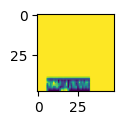

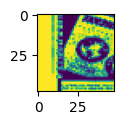

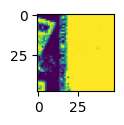

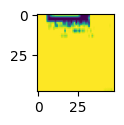

In [12]:
for i in range(4):
    plt.figure(figsize = (1, 1))
    plt.imshow(images[4][i])
    plt.grid(False)
    plt.show()

In [13]:
labels = to_categorical(labels)

In [14]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# our CNN Model

In [15]:
m = tf.keras.models.Sequential()
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(512, 3, activation = "relu" ), input_shape=(4, 48, 48, 1)))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(256, 3, activation = "relu")))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D()))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(0.2)))
m.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()))
m.add(tf.keras.layers.GlobalAveragePooling1D())
m.add(tf.keras.layers.Dense(1024, activation = "sigmoid"))
m.add(tf.keras.layers.Dropout(0.2))
m.add(tf.keras.layers.Dense(15, activation = "softmax"))

In [16]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 4, 46, 46, 512)    5120      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 4, 23, 23, 512)    0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 4, 23, 23, 512)    0         
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 4, 21, 21, 256)    1179904   
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 4, 10, 10, 256)    0

defining the optimizer, loss and metrics

In [17]:
m.compile(optimizer= "adam", loss = 'categorical_crossentropy',
              metrics = [ TruePositives(name='tp'),
                         FalsePositives(name='fp'),
                         TrueNegatives(name='tn'),
                         FalseNegatives(name='fn'),
                         "accuracy",
                         Precision(name='precision'),
                         Recall(name='recall'),
                         AUC(name='auc')])

In [18]:
from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'loss', patience = 16, mode = 'min', restore_best_weights = True)

**Train test split of the data**

In [19]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(images, labels, random_state=104, test_size=0.25, shuffle=True) 

In [20]:
y_test.shape

(9357, 15)

**Model training with 20 epochs**

In [21]:
history = m.fit(x_train, y_train, epochs=200, batch_size= 16)

Epoch 1/200
1755/1755 [==============================] - 118s 61ms/step - loss: 2.8610 - tp: 1.0000 - fp: 14.0000 - tn: 392966.0000 - fn: 28069.0000 - accuracy: 0.0666 - precision: 0.0667 - recall: 3.5625e-05 - auc: 0.5005
Epoch 2/200
1755/1755 [==============================] - 107s 61ms/step - loss: 2.8399 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 392980.0000 - fn: 28070.0000 - accuracy: 0.0690 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5007
Epoch 3/200
1755/1755 [==============================] - 107s 61ms/step - loss: 2.8307 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 392980.0000 - fn: 28070.0000 - accuracy: 0.0645 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4996
Epoch 4/200
1755/1755 [==============================] - 107s 61ms/step - loss: 2.8149 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 392980.0000 - fn: 28070.0000 - accuracy: 0.0658 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4999
Epoch 5/200
1755/1755 [==============================] - 107s 61ms/step - l

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1755/1755 [==============================] - 107s 61ms/step - loss: 2.7551 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 392980.0000 - fn: 28070.0000 - accuracy: 0.0657 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4994
Epoch 19/200
1755/1755 [==============================] - 107s 61ms/step - loss: 2.7529 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 392980.0000 - fn: 28070.0000 - accuracy: 0.0665 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5001
Epoch 20/200
1755/1755 [==============================] - 107s 61ms/step - loss: 2.7495 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 392980.0000 - fn: 28070.0000 - accuracy: 0.0662 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4999
Epoch 21/200
1755/1755 [==============================] - 107s 61ms/step - loss: 2.7448 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 392980.0000 - fn: 28070.0000 - accuracy: 0.0665 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5036
Epoch 22/200
1755/1755 [==============================] - 107s 61ms/step 

/tmp/ipykernel_42/3245002787.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


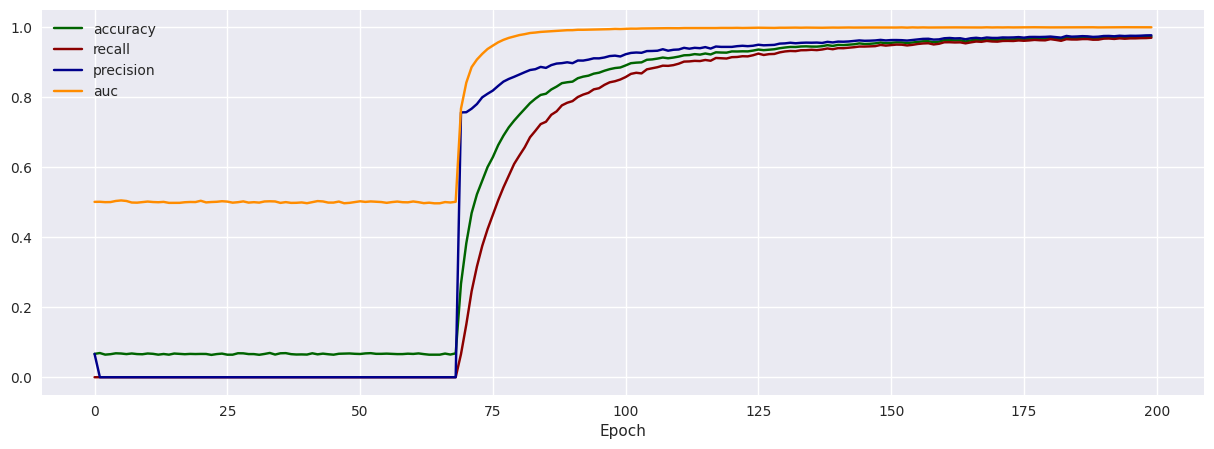

In [22]:
import matplotlib as mpl
mpl.style.use('seaborn')
plt.figure(figsize = (15, 5))
plt.plot(history.history['accuracy'], "darkgreen", label= "accuracy")
plt.plot(history.history['recall'], "darkred", label= "recall")
plt.plot(history.history['precision'], "darkblue", label= "precision")
plt.plot(history.history['auc'], "darkorange", label= "auc")
plt.xlabel('Epoch')
plt.legend()

/tmp/ipykernel_42/3988512833.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


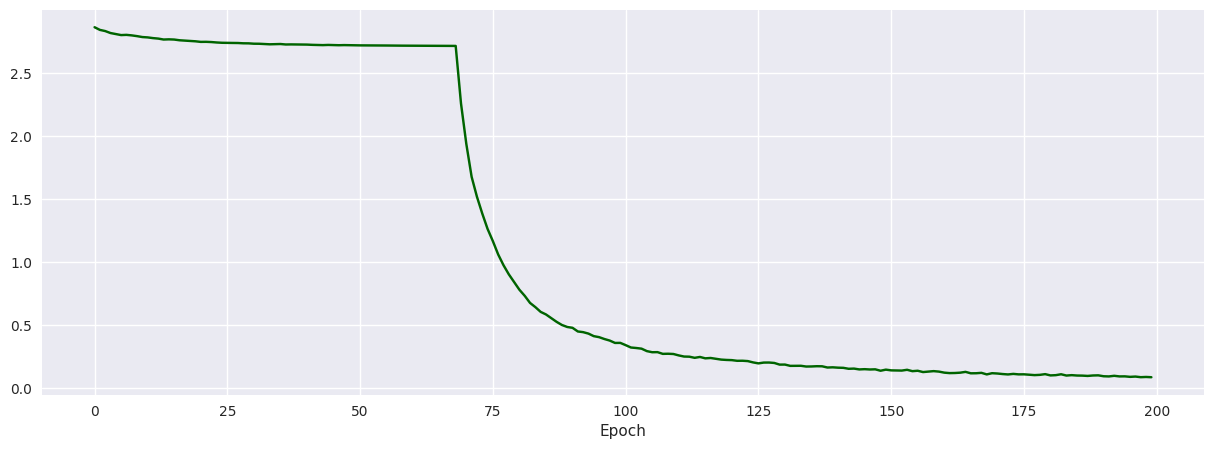

In [23]:

mpl.style.use('seaborn')
plt.figure(figsize = (15, 5))
plt.plot(history.history['loss'], "darkgreen", label= "accuracy")
plt.xlabel('Epoch')
plt.show()

In [24]:
m.evaluate(x_train, y_train, batch_size=16)

1755/1755 [==============================] - 24s 14ms/step - loss: 0.0033 - tp: 28053.0000 - fp: 10.0000 - tn: 392970.0000 - fn: 17.0000 - accuracy: 0.9995 - precision: 0.9996 - recall: 0.9994 - auc: 1.0000


[0.003279776079580188,
 28053.0,
 10.0,
 392970.0,
 17.0,
 0.9994656443595886,
 0.9996436834335327,
 0.9993943572044373,
 0.9999816417694092]

In [46]:
x_test.shape

(9357, 4, 48, 48)

In [25]:
y_pred = m.predict(x_test, batch_size=16, verbose= 1)
y_pred = np.argmax(y_pred, axis = 1)

585/585 [==============================] - 7s 12ms/step


In [34]:
y_pred

array([13,  9, 12, ...,  2, 14,  9])

In [27]:
y_testt = np.argmax(y_test, axis = 1)

In [35]:
y_testt

array([13, 13,  7, ...,  2,  6,  9])

In [36]:
print(classification_report(y_testt, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       641
           1       0.53      0.37      0.44       649
           2       0.84      0.84      0.84       637
           3       0.68      0.75      0.71       615
           4       0.28      0.40      0.33       625
           5       0.59      0.53      0.56       603
           6       0.34      0.33      0.34       623
           7       0.39      0.35      0.37       635
           8       0.37      0.41      0.39       605
           9       0.64      0.54      0.59       612
          10       0.39      0.36      0.37       653
          11       0.32      0.34      0.33       609
          12       0.69      0.70      0.69       631
          13       0.26      0.22      0.24       593
          14       0.49      0.60      0.54       626

    accuracy                           0.49      9357
   macro avg       0.50      0.49      0.49      9357
weighted avg       0.50   

In [30]:
print(classification_report(y_testt, y_pred))


              precision    recall  f1-score   support

           0       0.62      0.64      0.63       641
           1       0.53      0.37      0.44       649
           2       0.84      0.84      0.84       637
           3       0.68      0.75      0.71       615
           4       0.28      0.40      0.33       625
           5       0.59      0.53      0.56       603
           6       0.34      0.33      0.34       623
           7       0.39      0.35      0.37       635
           8       0.37      0.41      0.39       605
           9       0.64      0.54      0.59       612
          10       0.39      0.36      0.37       653
          11       0.32      0.34      0.33       609
          12       0.69      0.70      0.69       631
          13       0.26      0.22      0.24       593
          14       0.49      0.60      0.54       626

    accuracy                           0.49      9357
   macro avg       0.50      0.49      0.49      9357
weighted avg       0.50   

In [31]:
classes = list(range(15))
res = tf.math.confusion_matrix(y_pred,y_testt).numpy()
cm = pd.DataFrame(res,
                     index = classes, 
                     columns = classes)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,413,13,2,35,16,27,14,11,3,67,17,13,7,13,14
1,11,241,7,7,26,12,35,8,21,10,18,16,3,25,13
2,4,7,536,4,5,5,5,13,11,7,10,16,4,9,2
3,27,17,5,461,10,12,14,12,6,11,56,18,4,21,2
4,16,76,13,8,248,44,105,48,53,16,35,80,17,68,67
5,20,19,3,16,15,319,17,38,10,19,10,25,6,16,9
6,21,64,4,11,51,26,205,29,26,11,25,39,6,50,27
7,17,20,13,3,27,20,25,220,64,23,31,28,26,39,12
8,19,30,11,1,21,12,31,89,248,25,45,38,34,43,18
9,30,10,4,6,3,21,12,15,11,332,26,7,13,18,7


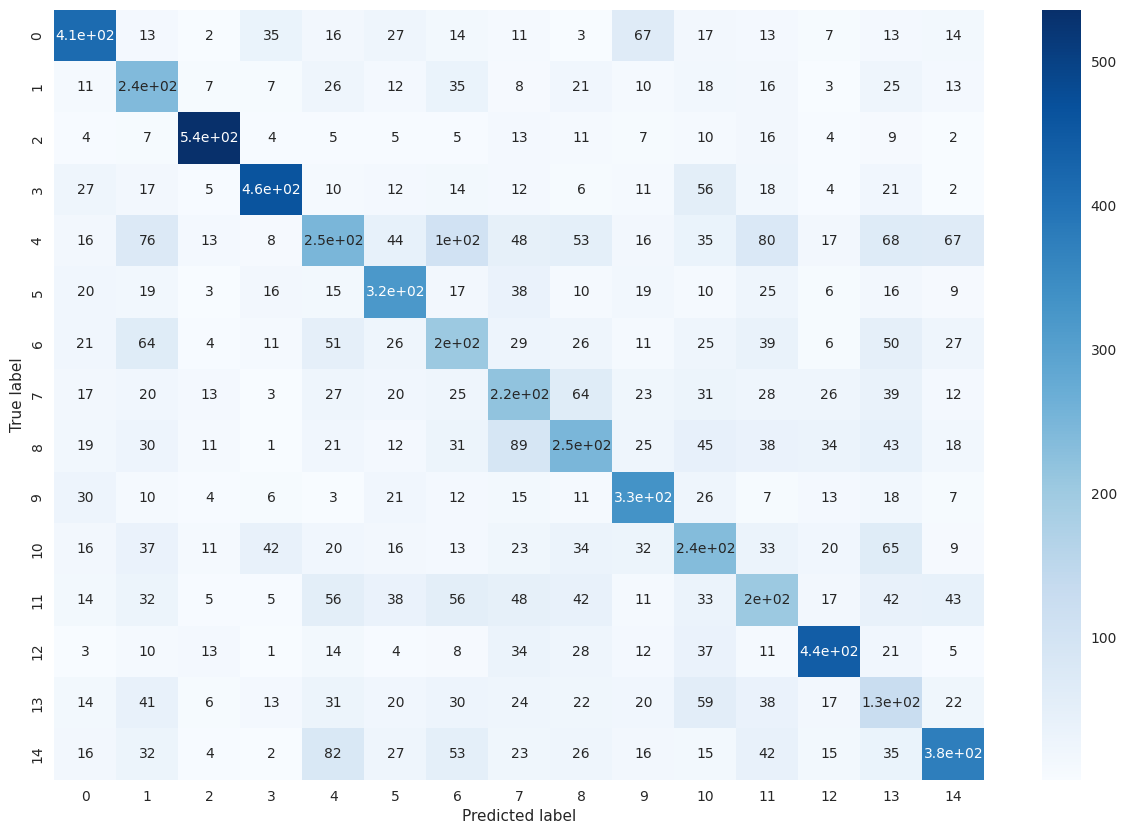

In [32]:
import seaborn as sns
figure = plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [38]:
from keras.models import load_model

m.save('my_model.h5')  

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
img = cv2.imread("/kaggle/input/resume/testresume.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# (thresh, img) = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
img = cv2.resize(img, (120, 120))
img1 = img[0:30, 0:120]/255
img2 = img[30:90, 0:60]/255
img3 = img[30:90, 60:120]/255
img4 = img[90:120, 0:120]/255
img = np.asarray([cv2.resize(img1, (48, 48)),
                          cv2.resize(img2, (48, 48)),
                          cv2.resize(img3, (48, 48)),
                          cv2.resize(img4, (48, 48))])
img_mean = np.mean(img)
img = img - img_mean
img = img / np.std(img)

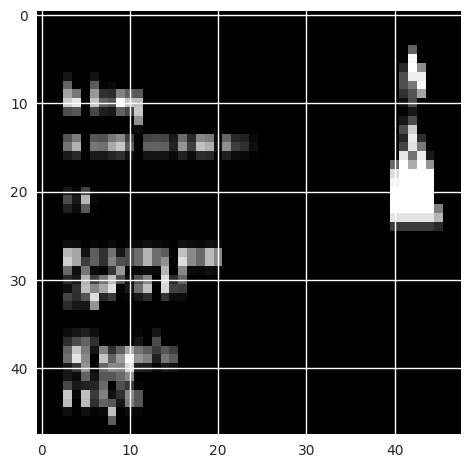

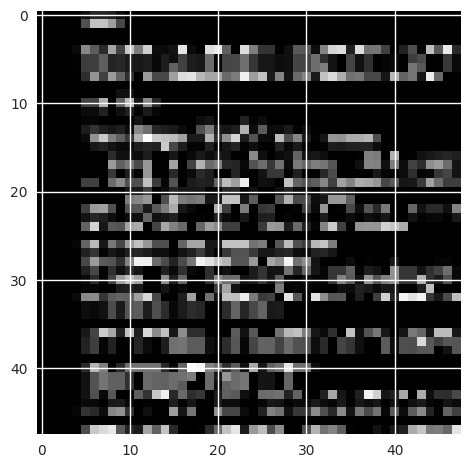

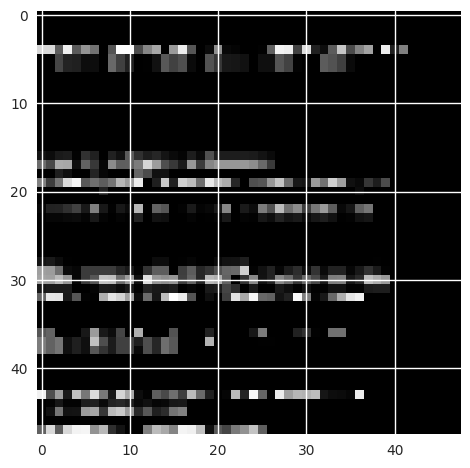

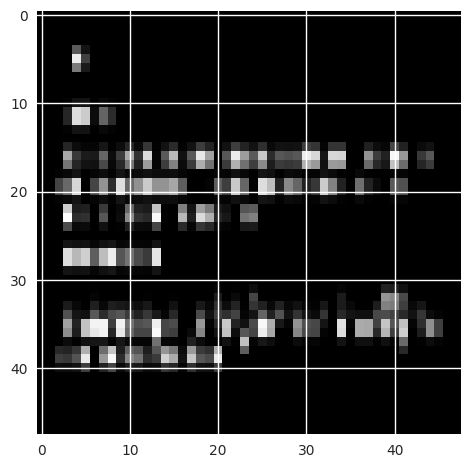

In [66]:
import matplotlib.pyplot as plt
for i in range(4):
    plt.imshow(img[i])
    plt.show()

In [71]:
img.shape

(4, 48, 48)

In [73]:
img1 = np.expand_dims(img, axis=0)
np.argmax(m.predict(img1))

1/1 [==============================] - 0s 20ms/step


7